# **Chapter 6 – Decision Trees**

_This notebook contains all the sample code and solutions to the exercises in chapter 6._

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed, as well as Scikit-Learn ≥0.20.

In [60]:
#check vesion python > 3.5
!python --version 

Python 3.7.4


In [61]:
#check vesion python > 3.5 TEACHER SOLUTION
import sys
assert sys.version_info >= (3,5)

In [62]:
#Check version Scikit-learn >= '0.20
import sklearn
assert sklearn.__version__ >= "0.20"

In [63]:
import numpy as np 
import os

#to make this notebook stable across runs
np.random.seed(42)

In [64]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Where to save the figures
PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'decision_trees'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR,'image',CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)



def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300): #tight_layout ==> parametro que ajusta la visualización lo mejor posible
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# Training and visualizing

In [65]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [66]:
iris = load_iris()
X = iris.data[:,2:] #petal length and width
y = iris.target

In [67]:
tree_clf = DecisionTreeClassifier(max_depth=2,
                                  random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

[Text(223.2, 453.0, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(111.6, 271.8, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(334.79999999999995, 271.8, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(223.2, 90.59999999999997, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(446.4, 90.59999999999997, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

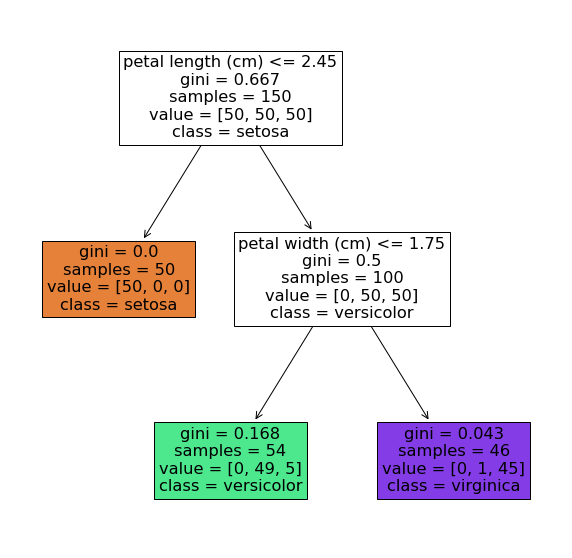

In [68]:
plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(tree_clf,
                        feature_names=iris.feature_names[2:],
                        class_names=iris.target_names,
                        filled=True) #parametro filled==> es oara que remarque el final del arbol

In [69]:

from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100) #100 valores
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    print('x1s: ', np.array_str(x1s))
    print()
    print('x2s: ', np.array_str(x2s))
    print()
    print('x1: ', np.array_str(x1))
    print()
    print('x2: ', np.array_str(x2))
    print()
    print('x1.ravel(): ', np.array_str(x1.ravel()))
    print()
    print('x2.ravel(): ', np.array_str(x2.ravel()))
    print()

    X_new = np.c_[x1.ravel(), x2.ravel()] 
    #np.c_ añade en columna según tamaño del último elemento

    #

    
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    #con esto predigo todos los puntos de mi gráfica y los coloco
    # en sus posiciones eje_x, eje_y dentro de la tabla 
    #'meshgrid' no devuelve los puntos colocados eje_x, eje_y, si no que 
    #devuelve todas las filas repetidas por cada columna
    # y todas las columnas repetidas por cada fila
    
    print('x1.shape:',x1.shape())
    print()
    print('y_pred:',np.array(y_pred))
    print()
    
    # pintamos las zonas y fronteras
    
    custom_cmap = ListedColormap(['#fafab0','#9898ff'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "gs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "b^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show();


x1s:  [0.         0.07575758 0.15151515 0.22727273 0.3030303  0.37878788
 0.45454545 0.53030303 0.60606061 0.68181818 0.75757576 0.83333333
 0.90909091 0.98484848 1.06060606 1.13636364 1.21212121 1.28787879
 1.36363636 1.43939394 1.51515152 1.59090909 1.66666667 1.74242424
 1.81818182 1.89393939 1.96969697 2.04545455 2.12121212 2.1969697
 2.27272727 2.34848485 2.42424242 2.5        2.57575758 2.65151515
 2.72727273 2.8030303  2.87878788 2.95454545 3.03030303 3.10606061
 3.18181818 3.25757576 3.33333333 3.40909091 3.48484848 3.56060606
 3.63636364 3.71212121 3.78787879 3.86363636 3.93939394 4.01515152
 4.09090909 4.16666667 4.24242424 4.31818182 4.39393939 4.46969697
 4.54545455 4.62121212 4.6969697  4.77272727 4.84848485 4.92424242
 5.         5.07575758 5.15151515 5.22727273 5.3030303  5.37878788
 5.45454545 5.53030303 5.60606061 5.68181818 5.75757576 5.83333333
 5.90909091 5.98484848 6.06060606 6.13636364 6.21212121 6.28787879
 6.36363636 6.43939394 6.51515152 6.59090909 6.66666667 6

TypeError: 'tuple' object is not callable

x1s: [0.         0.07575758 0.15151515 0.22727273 0.3030303  0.37878788
 0.45454545 0.53030303 0.60606061 0.68181818 0.75757576 0.83333333
 0.90909091 0.98484848 1.06060606 1.13636364 1.21212121 1.28787879
 1.36363636 1.43939394 1.51515152 1.59090909 1.66666667 1.74242424
 1.81818182 1.89393939 1.96969697 2.04545455 2.12121212 2.1969697
 2.27272727 2.34848485 2.42424242 2.5        2.57575758 2.65151515
 2.72727273 2.8030303  2.87878788 2.95454545 3.03030303 3.10606061
 3.18181818 3.25757576 3.33333333 3.40909091 3.48484848 3.56060606
 3.63636364 3.71212121 3.78787879 3.86363636 3.93939394 4.01515152
 4.09090909 4.16666667 4.24242424 4.31818182 4.39393939 4.46969697
 4.54545455 4.62121212 4.6969697  4.77272727 4.84848485 4.92424242
 5.         5.07575758 5.15151515 5.22727273 5.3030303  5.37878788
 5.45454545 5.53030303 5.60606061 5.68181818 5.75757576 5.83333333
 5.90909091 5.98484848 6.06060606 6.13636364 6.21212121 6.28787879
 6.36363636 6.43939394 6.51515152 6.59090909 6.66666667 6.

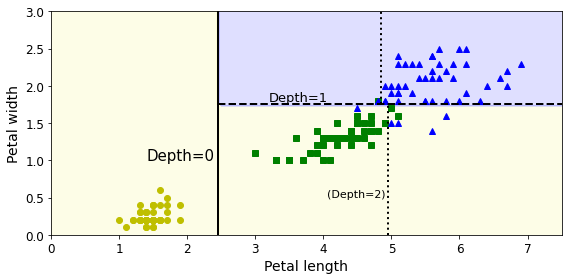

In [70]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100) # 100 valores
    x2s = np.linspace(axes[2], axes[3], 100) # 100 valores
    x1, x2 = np.meshgrid(x1s, x2s)
    print('x1s: ' + np.array_str(x1s))
    print()
    print('x2s: ' + np.array_str(x2s))
    print()
    print('x1: ' + np.array_str(x1))
    print()
    print('x2: ' + np.array_str(x2))
    print()
    print('x1.ravel(): ' + np.array_str(x1.ravel()))
    print()
    print('x2.ravel(): ' + np.array_str(x2.ravel()))
    print()
    X_new = np.c_[x1.ravel(), x2.ravel()] #ravel aplana en 1D,
    #np.c_ añade en columna según tamaño del último elemento
    # X_new es un array numpy de dos columnas que recorre
    # todos los puntos posibles de mi gráfica
    # primera columna con valores del eje x, 
    # segunda columna con valores del eje y
    
    print('X_new: ' + np.array_str(X_new))
    print()
    
    y_pred = clf.predict(X_new).reshape(x1.shape)
    # predigo todos los puntos de mi gráfica y los coloco
    # en sus posiciones ejex, ejey dentro de la tabla
    # (meshgrid no devuelve los puntos colocados ejex, ejey,
    # sino que devuelve todas las filas repetidas por cada columna
    # y todas las columnas repetidas por cada fila

    print('x1.shape: ' + str(x1.shape))
    print()
    print('y_pred: ' + np.array_str(y_pred))
    print()
    # pintamos las zonas y fronteras
    
    custom_cmap = ListedColormap(['#fafab0','#9898ff'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "gs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "b^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")

# Predicting classes and class probabilities

In [71]:
tree_clf.predict_proba([[5,1.5]]) #'predict_proba'==> indica la probabilidad de pertenecer a una clase

array([[0.        , 0.90740741, 0.09259259]])

In [72]:
tree_clf.predict([[5,1.5]])
# la clase[0] ==> setosa, [1] ==> virginica, [2]==> versicolor

array([1])

# Sensitivity to training set details
The main issue with Decision Trees is that they are very sensitive to small variations in the training data. For example, if you just remove the widest Iris versicolor from the iris training set (the one with petals 4.8 cm long and 1.8 cm wide) and train a new Decision Tree, you may get the model represented before. As you can see, it looks very different from the previous Decision Tree.

In [73]:
X[:10]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

In [74]:
X[(X[:,1] == X[:,1][y==1].max()) & (y==1)] #flor versicolor más ancha

array([[4.8, 1.8]])

In [75]:
not_widest_versicolor = (X[:,1]!=1.8)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

x1s: [0.         0.07575758 0.15151515 0.22727273 0.3030303  0.37878788
 0.45454545 0.53030303 0.60606061 0.68181818 0.75757576 0.83333333
 0.90909091 0.98484848 1.06060606 1.13636364 1.21212121 1.28787879
 1.36363636 1.43939394 1.51515152 1.59090909 1.66666667 1.74242424
 1.81818182 1.89393939 1.96969697 2.04545455 2.12121212 2.1969697
 2.27272727 2.34848485 2.42424242 2.5        2.57575758 2.65151515
 2.72727273 2.8030303  2.87878788 2.95454545 3.03030303 3.10606061
 3.18181818 3.25757576 3.33333333 3.40909091 3.48484848 3.56060606
 3.63636364 3.71212121 3.78787879 3.86363636 3.93939394 4.01515152
 4.09090909 4.16666667 4.24242424 4.31818182 4.39393939 4.46969697
 4.54545455 4.62121212 4.6969697  4.77272727 4.84848485 4.92424242
 5.         5.07575758 5.15151515 5.22727273 5.3030303  5.37878788
 5.45454545 5.53030303 5.60606061 5.68181818 5.75757576 5.83333333
 5.90909091 5.98484848 6.06060606 6.13636364 6.21212121 6.28787879
 6.36363636 6.43939394 6.51515152 6.59090909 6.66666667 6.

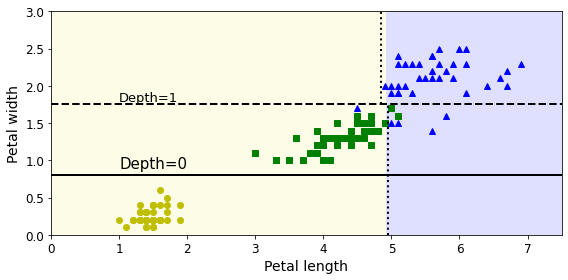

In [76]:
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)

plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)


save_fig("decision_tree_instability_plot")
plt.show();

On the left the Decision Tree is trained with the default hyperparameters (i.e., no restrictions), and on the right it’s trained with min_samples_leaf=4. It is quite obvious that the model on the left is overfitting, and the model on the right will probably generalize better.

x1s: [-1.5        -1.45959596 -1.41919192 -1.37878788 -1.33838384 -1.2979798
 -1.25757576 -1.21717172 -1.17676768 -1.13636364 -1.0959596  -1.05555556
 -1.01515152 -0.97474747 -0.93434343 -0.89393939 -0.85353535 -0.81313131
 -0.77272727 -0.73232323 -0.69191919 -0.65151515 -0.61111111 -0.57070707
 -0.53030303 -0.48989899 -0.44949495 -0.40909091 -0.36868687 -0.32828283
 -0.28787879 -0.24747475 -0.20707071 -0.16666667 -0.12626263 -0.08585859
 -0.04545455 -0.00505051  0.03535354  0.07575758  0.11616162  0.15656566
  0.1969697   0.23737374  0.27777778  0.31818182  0.35858586  0.3989899
  0.43939394  0.47979798  0.52020202  0.56060606  0.6010101   0.64141414
  0.68181818  0.72222222  0.76262626  0.8030303   0.84343434  0.88383838
  0.92424242  0.96464646  1.00505051  1.04545455  1.08585859  1.12626263
  1.16666667  1.20707071  1.24747475  1.28787879  1.32828283  1.36868687
  1.40909091  1.44949495  1.48989899  1.53030303  1.57070707  1.61111111
  1.65151515  1.69191919  1.73232323  1.77272727

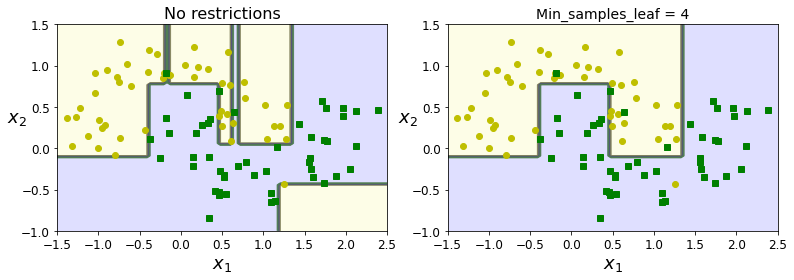

In [78]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state= 53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm,ym)
deep_tree_clf2.fit(Xm,ym)

plt.figure(figsize= (11,4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5,2.5,-1,1.5],
                        iris= False)
plt.title("No restrictions", fontsize= 16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5,2.5,-1,1.5],
                        iris= False)
plt.title("Min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize= 14)
save_fig('min_samples_leaf_plot')

x1s: [0.5        0.57070707 0.64141414 0.71212121 0.78282828 0.85353535
 0.92424242 0.99494949 1.06565657 1.13636364 1.20707071 1.27777778
 1.34848485 1.41919192 1.48989899 1.56060606 1.63131313 1.7020202
 1.77272727 1.84343434 1.91414141 1.98484848 2.05555556 2.12626263
 2.1969697  2.26767677 2.33838384 2.40909091 2.47979798 2.55050505
 2.62121212 2.69191919 2.76262626 2.83333333 2.9040404  2.97474747
 3.04545455 3.11616162 3.18686869 3.25757576 3.32828283 3.3989899
 3.46969697 3.54040404 3.61111111 3.68181818 3.75252525 3.82323232
 3.89393939 3.96464646 4.03535354 4.10606061 4.17676768 4.24747475
 4.31818182 4.38888889 4.45959596 4.53030303 4.6010101  4.67171717
 4.74242424 4.81313131 4.88383838 4.95454545 5.02525253 5.0959596
 5.16666667 5.23737374 5.30808081 5.37878788 5.44949495 5.52020202
 5.59090909 5.66161616 5.73232323 5.8030303  5.87373737 5.94444444
 6.01515152 6.08585859 6.15656566 6.22727273 6.2979798  6.36868687
 6.43939394 6.51010101 6.58080808 6.65151515 6.72222222 6.79

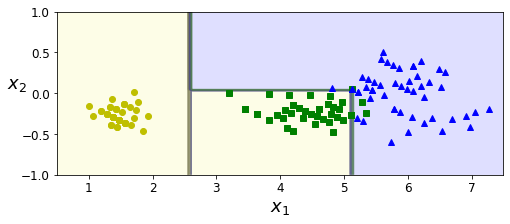

In [80]:
#Transformación de los angulos.min
#Queremos ver la modificación de 
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8,3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

x1s: [-0.7        -0.68585859 -0.67171717 -0.65757576 -0.64343434 -0.62929293
 -0.61515152 -0.6010101  -0.58686869 -0.57272727 -0.55858586 -0.54444444
 -0.53030303 -0.51616162 -0.5020202  -0.48787879 -0.47373737 -0.45959596
 -0.44545455 -0.43131313 -0.41717172 -0.4030303  -0.38888889 -0.37474747
 -0.36060606 -0.34646465 -0.33232323 -0.31818182 -0.3040404  -0.28989899
 -0.27575758 -0.26161616 -0.24747475 -0.23333333 -0.21919192 -0.20505051
 -0.19090909 -0.17676768 -0.16262626 -0.14848485 -0.13434343 -0.12020202
 -0.10606061 -0.09191919 -0.07777778 -0.06363636 -0.04949495 -0.03535354
 -0.02121212 -0.00707071  0.00707071  0.02121212  0.03535354  0.04949495
  0.06363636  0.07777778  0.09191919  0.10606061  0.12020202  0.13434343
  0.14848485  0.16262626  0.17676768  0.19090909  0.20505051  0.21919192
  0.23333333  0.24747475  0.26161616  0.27575758  0.28989899  0.3040404
  0.31818182  0.33232323  0.34646465  0.36060606  0.37474747  0.38888889
  0.4030303   0.41717172  0.43131313  0.4454545

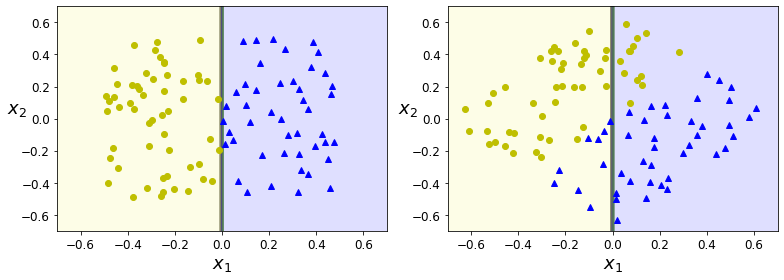

In [96]:

np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

plt.subplot(122)
plot_decision_boundary(tree_clf_s, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
save_fig('sensitivy_to_rotation')

x1s: [-0.7        -0.68585859 -0.67171717 -0.65757576 -0.64343434 -0.62929293
 -0.61515152 -0.6010101  -0.58686869 -0.57272727 -0.55858586 -0.54444444
 -0.53030303 -0.51616162 -0.5020202  -0.48787879 -0.47373737 -0.45959596
 -0.44545455 -0.43131313 -0.41717172 -0.4030303  -0.38888889 -0.37474747
 -0.36060606 -0.34646465 -0.33232323 -0.31818182 -0.3040404  -0.28989899
 -0.27575758 -0.26161616 -0.24747475 -0.23333333 -0.21919192 -0.20505051
 -0.19090909 -0.17676768 -0.16262626 -0.14848485 -0.13434343 -0.12020202
 -0.10606061 -0.09191919 -0.07777778 -0.06363636 -0.04949495 -0.03535354
 -0.02121212 -0.00707071  0.00707071  0.02121212  0.03535354  0.04949495
  0.06363636  0.07777778  0.09191919  0.10606061  0.12020202  0.13434343
  0.14848485  0.16262626  0.17676768  0.19090909  0.20505051  0.21919192
  0.23333333  0.24747475  0.26161616  0.27575758  0.28989899  0.3040404
  0.31818182  0.33232323  0.34646465  0.36060606  0.37474747  0.38888889
  0.4030303   0.41717172  0.43131313  0.4454545

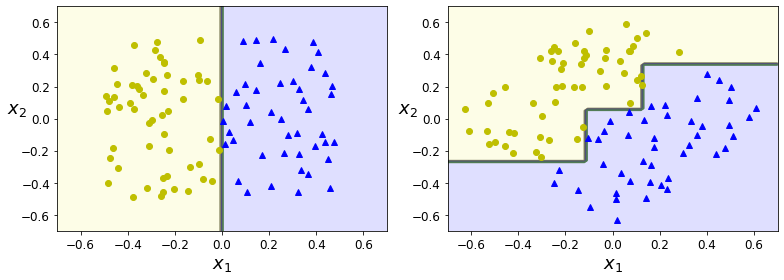

In [97]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7],
                      iris=False)

plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7],
                      iris=False)
save_fig("sensivity_to_rotation")

# Regression trees

In [89]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m,1)
y = 4 * (X - 0.5)**2
y = y + np.random.rand(m,1)/10

In [93]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

Saving figure tree_regression_plot


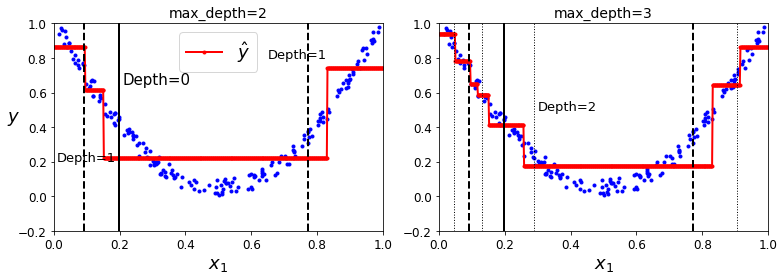

In [95]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state= 42, max_depth=2)
tree_reg1.fit(X,y)

tree_reg2 = DecisionTreeRegressor(random_state= 42, max_depth=3)
tree_reg2.fit(X,y)



def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()


In [ ]:
#volvemos en 2021


In [6]:

'''
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()
'''

'\nplt.figure(figsize=(11, 4))\n\nplt.subplot(121)\nplt.plot(X, y, "b.")\nplt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\\hat{y}$")\nplt.axis([0, 1, -0.2, 1.1])\nplt.xlabel("$x_1$", fontsize=18)\nplt.ylabel("$y$", fontsize=18, rotation=0)\nplt.legend(loc="upper center", fontsize=18)\nplt.title("No restrictions", fontsize=14)\n\nplt.subplot(122)\nplt.plot(X, y, "b.")\nplt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\\hat{y}$")\nplt.axis([0, 1, -0.2, 1.1])\nplt.xlabel("$x_1$", fontsize=18)\nplt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)\n\nsave_fig("tree_regression_regularization_plot")\nplt.show()\n'